<a href="https://colab.research.google.com/github/BhargavaSimhaR/RedRot/blob/main/RedRot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install tensorflow --quiet

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten,
    TimeDistributed, LSTM, Dense, Dropout, Reshape
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [18]:
train_dir = "/content/drive/MyDrive/RedRotImages/train"
test_dir = "/content/drive/MyDrive/RedRotImages/test"

In [19]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = 2  # Healthy, Unhealthy
BATCH_SIZE = 32
EPOCHS = 20

In [20]:
# 📈 Data Preprocessing with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [21]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 692 images belonging to 2 classes.


In [22]:
val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 172 images belonging to 2 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 115 images belonging to 2 classes.


In [24]:
# 🧠 CNN + RNN Model
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Reshape to sequence
shape = x.shape
x = Reshape((shape[1], shape[2] * shape[3]))(x)

x = LSTM(64)(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 2048)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │       540,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,450 (2.14 MB)

 Trainable params: 560,450 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5339 - loss: 0.7151 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 446s 20s/step - accuracy: 0.5333 - loss: 0.7156 - val_accuracy: 0.5000 - val_loss: 0.6883
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.5089 - loss: 0.7019 - val_accuracy: 0.5058 - val_loss: 0.6903
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.4812 - loss: 0.7081 - val_accuracy: 0.5058 - val_loss: 0.6892
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.5619 - loss: 0.6783 - val_accuracy: 0.5872 - val_loss: 0.6816
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.5807 - loss: 0.6615 - val_accuracy: 0.6279 - val_loss: 0.6364
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.6916 - loss: 0.5871 - val_accuracy: 0.5116 - val_loss: 0.7181
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.6362 - loss: 0.6266 - val_accuracy: 0.6512 - val_loss: 0.6474
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.7361 - loss: 0.5576 - val_accuracy: 0.6919 - val_loss: 0.589

In [27]:
history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.9281 - loss: 0.1905 - val_accuracy: 0.9186 - val_loss: 0.2227
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.9279 - loss: 0.2427 - val_accuracy: 0.9244 - val_loss: 0.2081
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.9325 - loss: 0.1643 - val_accuracy: 0.9302 - val_loss: 0.1871
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9511 - loss: 0.1296 - val_accuracy: 0.8895 - val_loss: 0.3013
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9125 - loss: 0.2268 - val_accuracy: 0.8663 - val_loss: 0.3074


In [28]:
for key in history2.history:
    history.history[key] += history2.history[key]

In [29]:
history3 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3
)

Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.9274 - loss: 0.1903 - val_accuracy: 0.9244 - val_loss: 0.1983
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.9132 - loss: 0.2248 - val_accuracy: 0.7035 - val_loss: 0.5542
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.9023 - loss: 0.3015 - val_accuracy: 0.8837 - val_loss: 0.2987


In [30]:
for key in history3.history:
    history.history[key] += history3.history[key]

In [40]:
# Get final training and validation metrics
final_train_acc = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"✅ Final Training Accuracy: {final_train_acc*100:.4f}")
print(f"✅ Final Training Loss:     {final_train_loss*100:.4f}")
print(f"✅ Final Validation Accuracy: {final_val_acc*100:.4f}")
print(f"✅ Final Validation Loss:     {final_val_loss*100:.4f}")

✅ Final Training Accuracy: 96.4855
✅ Final Training Loss:     25.2088
✅ Final Validation Accuracy: 94.3721
✅ Final Validation Loss:     29.8741


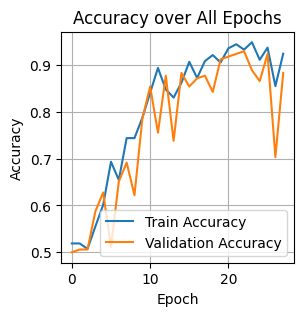

In [43]:
# 📊 Plot Full Accuracy
plt.figure(figsize=(3,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over All Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# 🧪 Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.2f}")

115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8620 - loss: 0.3681
✅ Test Accuracy: 0.96


In [46]:
# 💾 Save Model
model.save('/content/redrot_cnn_rnn_model.h5')
print("✅ Model saved at /content/redrot_cnn_rnn_model.h5")

✅ Model saved at /content/redrot_cnn_rnn_model.h5
